## Convolutional Neural Networks - Fashion MNIST
<p>This is a dataset of fashion images. The categorization is given below </p>

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

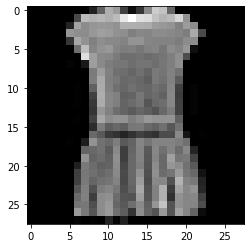

In [28]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3], cmap='gray')

In [25]:
y_train[2]

0

In [8]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [46]:
#create model
model = Sequential()

In [47]:
model.add(Conv2D(128, 
                 kernel_size=3,
                 activation='relu',
                 input_shape=(28,28,1)))

In [48]:
model.add(MaxPool2D(pool_size = 2))

In [49]:
model.add(Conv2D(128, 
                 kernel_size=3, 
                 activation='relu'))
model.add(MaxPool2D(pool_size = 2))

In [50]:
model.add(Flatten())

In [51]:
model.add(Dense(128, activation = 'relu')) # Fully connected layer 1
model.add(Dense(64, activation = 'relu')) # Fully Connected Layer 2
model.add(Dense(10, activation='softmax')) # Output layer

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [53]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [54]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 150s 80ms/step - loss: 0.4313 - accuracy: 0.8427 - val_loss: 0.3249 - val_accuracy: 0.8834
Epoch 2/3
1875/1875 [==============================] - 150s 80ms/step - loss: 0.2864 - accuracy: 0.8942 - val_loss: 0.2955 - val_accuracy: 0.8899
Epoch 3/3
1875/1875 [==============================] - 150s 80ms/step - loss: 0.2371 - accuracy: 0.9122 - val_loss: 0.2843 - val_accuracy: 0.8969


In [55]:
import numpy as np

In [56]:
y_train_pred = np.argmax(model.predict(X_train),axis=1)

In [57]:
y_test_pred = np.argmax(model.predict(X_test), axis=1)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [59]:
print("Training Set Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred, y_true=y_train))
print("\n")
print(f" Training Set Accuracy {accuracy_score(y_pred = y_train_pred, y_true=y_train)}")

Training Set Confusion Matrix
[[5726    1   27  108    9    5  114    0   10    0]
 [  14 5941    0   37    3    2    0    0    3    0]
 [ 205    2 5347   68  221    2  143    0   12    0]
 [  93   16   14 5754   95    1   25    0    2    0]
 [  14    6  554  210 5032    1  175    0    8    0]
 [   0    0    0    0    0 5967    0   21    0   12]
 [1183    5  442  195  384    1 3775    0   15    0]
 [   0    0    0    0    0   45    0 5809    0  146]
 [  10    0    3   11    7   31    7    2 5929    0]
 [   0    0    0    0    0   27    0  115    1 5857]]


 Training Set Accuracy 0.91895


In [60]:
print("Test Set Confusion Matrix")
print(confusion_matrix(y_pred = y_test_pred, y_true=y_test))
print("\n")
print(f" Test Set Accuracy {accuracy_score(y_pred = y_test_pred, y_true=y_test)}")

Test Set Confusion Matrix
[[939   0   8  18   2   2  28   0   3   0]
 [  5 978   0  13   1   0   1   0   2   0]
 [ 31   0 862  12  42   0  50   0   3   0]
 [ 17   6   5 947  13   0  12   0   0   0]
 [  1   0 112  43 802   0  39   0   3   0]
 [  0   0   0   0   0 990   0   7   0   3]
 [212   1  90  41  82   1 558   0  15   0]
 [  0   0   0   0   0  10   0 966   0  24]
 [  6   0   2   4   2  10   2   2 972   0]
 [  0   0   0   0   0  13   0  32   0 955]]


 Test Set Accuracy 0.8969


In [61]:
y_test_pred[0:5]

array([9, 2, 1, 1, 6])

In [ ]:
y_test[0:5]